# Lab 4 - Student Notebook

## Overview

In this lab, you will prepare a dataset for creating a forecast by using Amazon Forecast.

This lab includes two Jupyter notebooks:

1. This notebook contains the steps that you will follow to prepare the dataset and evaluate the forecast.
2. The `forecast-autorun.ipynb` notebook contains the steps to create the forecast by using Amazon Forecast. This notebook is run in the background when the lab starts, and it can take between 1–2 hours to complete. You will refer to this notebook during the lab steps, but you won't need to run any cells.


## About the dataset

This [Online Retail II](https://archive.ics.uci.edu/ml/datasets/Online+Retail+II) dataset contains all transactions that occurred between January 12, 2009 and September 12, 2011 for a non-store, online retail organization that's registered and based in the United Kingdom. The company mainly sells unique all-occasion giftware. Many customers of the company are wholesalers.


## Attribute information

- **InvoiceNo** – Invoice number. Nominal. A 6-digit integral number that's uniquely assigned to each transaction. If this code starts with the letter *c*, it indicates a cancelation.
- **StockCode** – Product (item) code. Nominal. A 5-digit integral number that's uniquely assigned to each distinct product.
- **Description** – Product (item) name. Nominal.
- **Quantity** – The quantities of each product (item) per transaction. Numeric.
- **InvoiceDate** – Invoice date and time. Numeric. The day and time when a transaction was generated.
- **UnitPrice** – Unit price. Numeric. Product price per unit in pounds sterling (£).
- **CustomerID** – Customer number. Nominal. A 5-digit integral number that's uniquely assigned to each customer.
- **Country** – Country name. Nominal. The name of the country where a customer resides.


## Dataset attributions

This dataset was obtained from:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository (http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science.

## Lab instructions

To complete this lab, read and run the cells below.

## Task 1: Importing Python packages

Start by importing the Python packages that you need.

In the following code:

- *boto3* represents the AWS SDK for Python (Boto3), which is the Python library for AWS
- *pandas* provides DataFrames for manipulating time series data
- *matplotlib* provides plotting functions
- *sagemaker* represents the API that's needed to work with Amazon SageMaker
- *time*, *sys*, *os*, *io*, and *json* provide helper functions 


In [1]:
import warnings
warnings.filterwarnings('ignore')
bucket_name='c80970a1712895l3943634t1w208060389-forecastbucket-14zahw943fsz0'

import boto3
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sagemaker
import time, sys, os, io, json
import xlrd


## Task 2: Exploring the data


The data is in the *Microsoft Excel* format. pandas can read Excel files.

**Note:** This data might take 1–2 minutes to load

In [2]:
retail = pd.read_excel('online_retail_II.xlsx',engine='openpyxl')

According to the description for the dataset, some values are missing. To keep things simple, you will remove anything wtih a missing value.

In [3]:
retail = retail.dropna()

Start by examining the data.

How many rows and columns are in the dataset?

In [4]:
retail.shape

(417534, 8)

What are the data types?

In [5]:
retail.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

What does the data look like?

In [6]:
retail.head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


Amazon Forecast has schemas for domains such as retail. Review the schema information at [RETAIL Domain](https://docs.aws.amazon.com/forecast/latest/dg/retail-domain.html) in the AWS Documentation.

The target time series is the historical time series data for each item or product that's sold by the retail organization. The following fields are required:

- **item_id** (string) – A unique identifier for the item or product that you want to predict the demand for.
- **timestamp** (timestamp)
- **demand** (float) – The number of sales for that item at the timestamp. It's also the target field that Amazon Forecast generates a forecast for.



If you examine the previous data, there are certain columns that you don't need for your investigation. You can drop these columns. The columns you can drop are **Invoice**, **Description**, and **Customer ID**. 

**Note:** It's possible that items in the same order (as shown by the **Invoice** column) could have a correlation that impacts the model. For this lab, you will ignore this possibility.

Drop the columns that you don't need.

In [7]:
retail = retail[['StockCode','Quantity','Price','Country','InvoiceDate']]

The **InvoiceDate** column is your datetime data. You can inform pandas of this by using the `to_datetime` function. You can explore the data by time by setting the index of the DataFrame to the **InvoiceDate** column.

In [8]:
retail['InvoiceDate'] = pd.to_datetime(retail.InvoiceDate)
retail = retail.set_index('InvoiceDate')

You will now examine the updated DataFrame.

The number of rows and columns are:

In [9]:
retail.shape

(417534, 4)

The new data looks like this example:

In [10]:
retail.head()

,StockCode,Quantity,Price,Country
InvoiceDate,,,,
2009-12-01 07:45:00,85048,12,6.95,United Kingdom
2009-12-01 07:45:00,79323P,12,6.75,United Kingdom
2009-12-01 07:45:00,79323W,12,6.75,United Kingdom
2009-12-01 07:45:00,22041,48,2.10,United Kingdom
2009-12-01 07:45:00,21232,24,1.25,United Kingdom


Note that **InvoiceDate** is the index, and it's shown in the first column.

Because you set the index to your datetime data, you can use it to select data.

To select all the rows from a specific date, use the date in the index.

In [11]:
retail['2010-01-04']

,StockCode,Quantity,Price,Country
InvoiceDate,,,,
2010-01-04 09:24:00,TEST001,5,4.50,United Kingdom
2010-01-04 09:43:00,21539,-1,4.25,United Kingdom
2010-01-04 09:53:00,TEST001,5,4.50,United Kingdom
2010-01-04 10:28:00,21844,36,2.55,United Kingdom
2010-01-04 10:28:00,21533,12,4.25,United Kingdom
...,...,...,...,...
2010-01-04 17:39:00,90214G,1,1.25,United Kingdom
2010-01-04 17:39:00,90214N,1,1.25,United Kingdom
2010-01-04 17:39:00,90214N,1,1.25,United Kingdom


You can use parts of a date, and date ranges. To view the **Jan** and **Feb** rows:

In [12]:
retail['2010-01':'2010-02']

,StockCode,Quantity,Price,Country
InvoiceDate,,,,
2010-01-04 09:24:00,TEST001,5,4.50,United Kingdom
2010-01-04 09:43:00,21539,-1,4.25,United Kingdom
2010-01-04 09:53:00,TEST001,5,4.50,United Kingdom
2010-01-04 10:28:00,21844,36,2.55,United Kingdom
2010-01-04 10:28:00,21533,12,4.25,United Kingdom
...,...,...,...,...
2010-02-28 16:14:00,84279B,1,3.75,United Kingdom
2010-02-28 16:14:00,84882,1,3.75,United Kingdom
2010-02-28 16:14:00,84882,1,3.75,United Kingdom


The date range starts at:

In [13]:
retail.index.min()

Timestamp('2009-12-01 07:45:00')

The date range ends at:

In [14]:
retail.index.max()

Timestamp('2010-12-09 20:01:00')

With pandas, you can extract date information easily. You might extract date information to explore the data further and look for time-related trends.

Extract the year, month, and day of the week.

In [15]:
retail['Year'] = retail.index.year
retail['Month'] = retail.index.month
retail['weekday_name'] = retail.index.day_name()

In [16]:
retail.head()

,StockCode,Quantity,Price,Country,Year,Month,weekday_name
InvoiceDate,,,,,,,
2009-12-01 07:45:00,85048,12,6.95,United Kingdom,2009,12,Tuesday
2009-12-01 07:45:00,79323P,12,6.75,United Kingdom,2009,12,Tuesday
2009-12-01 07:45:00,79323W,12,6.75,United Kingdom,2009,12,Tuesday
2009-12-01 07:45:00,22041,48,2.10,United Kingdom,2009,12,Tuesday
2009-12-01 07:45:00,21232,24,1.25,United Kingdom,2009,12,Tuesday


The dataset that you now have includes purchases made between December 2009 and December 2010. It's reasonable to assume there would be some seasonality in this data. You will now investigate whether there is seasonality.

<AxesSubplot: >

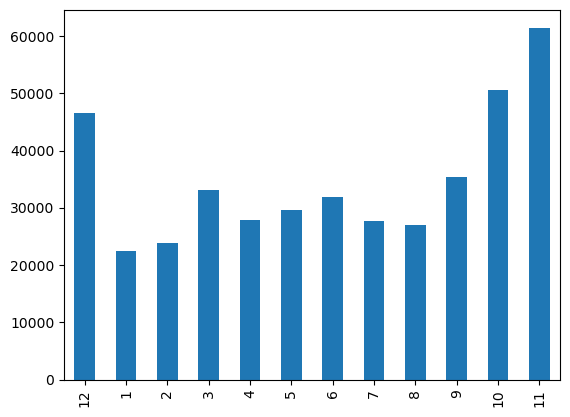

In [17]:
retail.Month.value_counts(sort=False).plot(kind='bar')

From the chart, you could deduce some seasonality:

1. November and December seem to be higher than the rest of the year.

2. Q4 seems to be higher than other quarters.

3. For Q1, Q2, and Q3: The last month of the quarter (months 3, 6, and 9) seem to have spikes.

Do you notice any other seasonal patterns?

Now, investigate whether there is any seasonality during the week.

<AxesSubplot: >

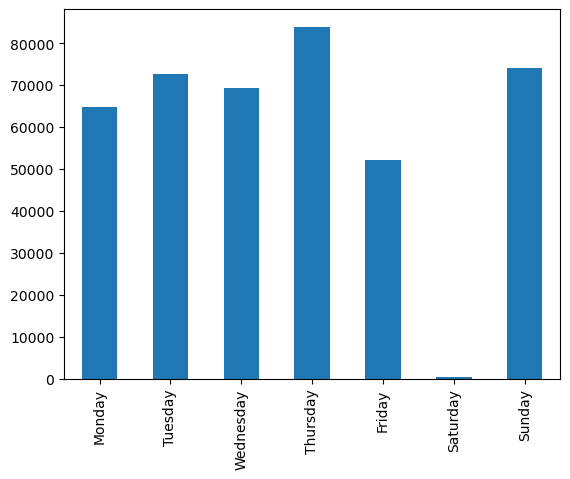

In [18]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
retail.weekday_name.value_counts(sort=False).loc[day_order].plot(kind='bar')

Saturday shows very few orders. Why might this be the case?

## Task 3: Cleaning and reducing the size of the data

In this task, you will reduce the size of the data. You will also remove any anomalies, such as negative prices, outliers, and country data.

### Reducing the countries
Examine the **Country** data.

In [19]:
retail.Country.unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Netherlands', 'Poland',
       'Spain', 'Channel Islands', 'Italy', 'Cyprus', 'Greece', 'Norway',
       'Austria', 'Sweden', 'United Arab Emirates', 'Finland',
       'Switzerland', 'Unspecified', 'Nigeria', 'Malta', 'RSA',
       'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania',
       'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland'],
      dtype=object)

In [20]:
retail.Country.value_counts()

United Kingdom          379423
EIRE                      8710
Germany                   8129
France                    5710
Netherlands               2769
Spain                     1278
Switzerland               1187
Belgium                   1054
Portugal                  1024
Channel Islands            906
Sweden                     883
Italy                      731
Australia                  654
Cyprus                     554
Austria                    537
Greece                     517
Denmark                    428
Norway                     369
Finland                    354
United Arab Emirates       318
Unspecified                280
USA                        244
Japan                      224
Poland                     194
Malta                      172
Lithuania                  154
Singapore                  117
Canada                      77
Thailand                    76
Israel                      74
Iceland                     71
RSA                         65
Korea   

Most of the data seems to be for the United Kingdom. To make your job easier, filter the data by *United Kingdom*.

In [21]:
country_filter = ['United Kingdom']
retail = retail[retail.Country.isin(country_filter)]

Because the **Country** column only contains the same value, you can drop it.

In [22]:
retail = retail[['StockCode','Quantity','Price']]

In [23]:
retail.head()

,StockCode,Quantity,Price
InvoiceDate,,,
2009-12-01 07:45:00,85048,12,6.95
2009-12-01 07:45:00,79323P,12,6.75
2009-12-01 07:45:00,79323W,12,6.75
2009-12-01 07:45:00,22041,48,2.10
2009-12-01 07:45:00,21232,24,1.25


### Examining StockCode and removing anomalies

Examine the distribution of the **StockCode** column:

In [24]:
retail.StockCode.describe()

count     379423
unique      4015
top       85123A
freq        3140
Name: StockCode, dtype: object

There are 4,015 unique values for **StockCode**. A quick plot of the counts might give you some insight into how the values are distributed.

<AxesSubplot: >

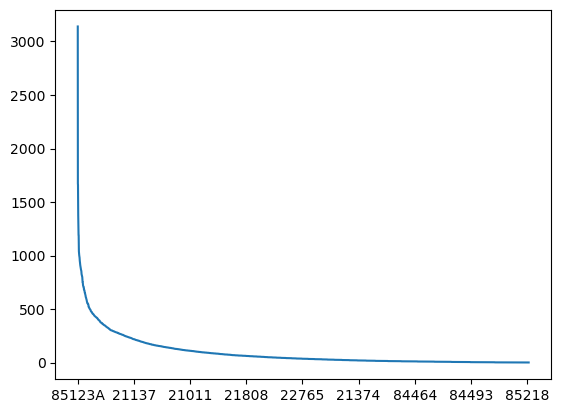

In [25]:
retail.StockCode.value_counts().plot()

It seems that there are a few high-selling products, with a long tail behind them. You could investigate this situation further. However, for now, examine **Quantity**.

In [26]:
retail.Quantity.describe()

count    379423.000000
mean         11.451517
std          68.943709
min       -9360.000000
25%           2.000000
50%           4.000000
75%          12.000000
max       10000.000000
Name: Quantity, dtype: float64

<AxesSubplot: xlabel='InvoiceDate'>

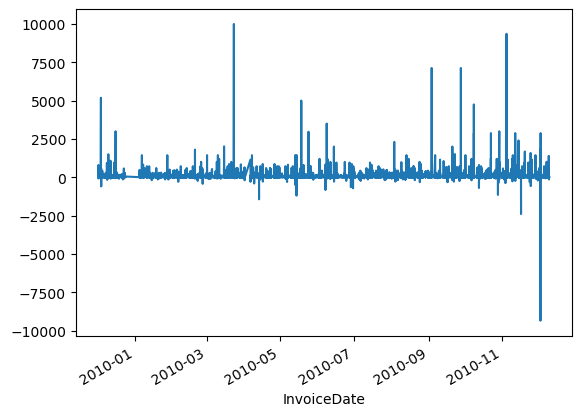

In [27]:
retail.Quantity.plot()

From the initial plot, notice a couple of interesting aspects.

1. There appear to be negative quantities.

2. There are very large spikes throughout the year.


Negative and zero quantities could impact the forecast if you don't know why these values exist. To make things easier for now, you will remove negative and zero quantities

In [28]:
retail = retail[retail.Quantity>0]

Now, examine **Price**.

In [29]:
retail.Price.describe()

count    370951.000000
mean          3.145220
std          30.551482
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       10953.500000
Name: Price, dtype: float64

<AxesSubplot: xlabel='InvoiceDate'>

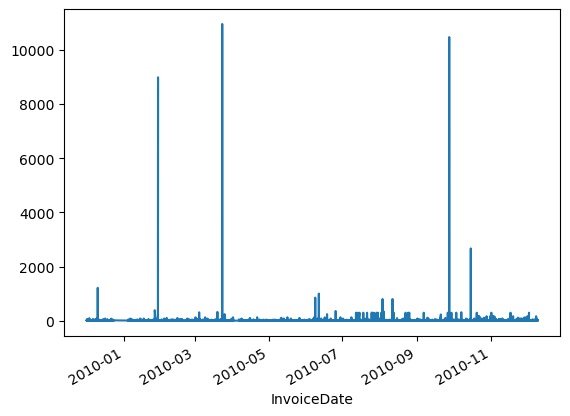

In [30]:
retail.Price.plot()

The plot shows some clear price spikes. You will now try to find out why these spikes exist.

In [31]:
retail[retail.Price>500].head()

,StockCode,Quantity,Price
InvoiceDate,,,
2009-12-10 11:50:00,M,1,1213.02
2010-01-29 11:04:00,M,1,8985.60
2010-03-23 15:22:00,M,1,10953.50
2010-06-08 16:39:00,M,1,849.45
2010-06-11 15:54:00,M,1,1000.63


The **StockCode** value of *M* looks unusual. If you had access to a domain expert, you could learn about the importance of *M*. Because you can't ask a domain expert for this lab, you will drop everything that has a **StockCode** value of *M*.

In [32]:
retail = retail[retail.StockCode!='M']

In [33]:
retail.Price.describe()

count    370576.000000
mean          3.009463
std           4.576951
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         387.540000
Name: Price, dtype: float64

This result is better, but the **max** value is still high. You will now investigate this situation further.

In [34]:
retail[retail.Price>300].head(20)

,StockCode,Quantity,Price
InvoiceDate,,,
2010-01-26 16:29:00,ADJUST,1,342.80
2010-01-26 17:28:00,ADJUST,1,387.54
2010-06-25 14:15:00,ADJUST2,1,300.13
2010-06-25 14:15:00,ADJUST2,1,358.47
2010-08-04 11:38:00,POST,1,334.88


It seems that some adjustments occurred. You will also drop any data that shows these adjustments.

In [35]:
stockcodes = ['ADJUST', 'ADJUST2', 'POST']
retail = retail[~retail.StockCode.isin(stockcodes)]

In [36]:
retail.Price.describe()

count    370554.000000
mean          3.002500
std           4.363688
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         295.000000
Name: Price, dtype: float64

You will now examine zero-priced items.

In [37]:
retail[retail.Price==0].count

<bound method DataFrame.count of                     StockCode  Quantity  Price
InvoiceDate                                   
2009-12-02 13:34:00     22076        12    0.0
2009-12-03 11:19:00     48185         2    0.0
2009-12-08 15:25:00     22065         1    0.0
2009-12-08 15:25:00     22142        12    0.0
2009-12-15 13:49:00     85042         8    0.0
2009-12-18 14:22:00     21143        12    0.0
2010-01-06 14:54:00     79320        24    0.0
2010-01-15 12:43:00     21533        12    0.0
2010-02-12 14:58:00   TEST001         5    0.0
2010-02-12 15:47:00   TEST001         5    0.0
2010-03-04 11:44:00     21662         1    0.0
2010-04-01 17:13:00     22459         8    0.0
2010-04-01 17:13:00     22458         8    0.0
2010-06-11 11:12:00     21765         1    0.0
2010-06-17 10:12:00     20914         2    0.0
2010-06-24 12:34:00     22423         5    0.0
2010-07-19 13:13:00     22690         6    0.0
2010-09-27 16:59:00    46000M       648    0.0
2010-09-30 12:19:00     222

There aren't many values in these results, so you can drop zero-priced items.

In [38]:
retail = retail[retail.Price>0]

### Splitting the data

The timeseries data that you need to create a forecast requires a *timestamp*, an *itemId*, and a *demand*. These features will map to the **InvoiceDate**, **StockCode**, and **Quantity** columns.

The related timeseries data needs a *timestamp*, an *itemId*, and a *price*. These features will map to the **InvoiceDate**, **StockCode**, and **Price** columns.

Create the two DataFrames:

In [39]:
df_time_series = retail[['StockCode','Quantity']]
df_related_time_series = retail[['StockCode','Price']]

### Downsampling

You will now examine a single item.

In [40]:
df_time_series[df_time_series.StockCode==21232]['2009-12-01']

,StockCode,Quantity
InvoiceDate,,
2009-12-01 07:45:00,21232,24
2009-12-01 10:49:00,21232,48
2009-12-01 12:13:00,21232,3
2009-12-01 12:14:00,21232,20
2009-12-01 13:31:00,21232,4
2009-12-01 13:37:00,21232,12
2009-12-01 13:43:00,21232,24
2009-12-01 14:19:00,21232,12
2009-12-01 15:26:00,21232,12


You can see multiple orders for each day. You want to create a forecast that predicts demand at a daily level.

You must *downsample* the data from the individual orders into a daily total.

The orders for each day can be summed, because the total demand for the day is the value that you will forecast.

pandas provides the `resample` function for this purpose. `sum` will sum the **Quantity** column. You will also reset the index based on the **InvoiceDate** value. However, this time, it will be a date without the time portion.

**Note:** It might take up to 1 minute for this process to complete.

In [41]:
df_time_series = df_time_series.groupby('StockCode').resample('D').sum().reset_index()

In [42]:
df_time_series['InvoiceDate'] = pd.to_datetime(df_time_series.InvoiceDate)
df_time_series = df_time_series.set_index('InvoiceDate')
df_time_series.head()

,StockCode,Quantity
InvoiceDate,,
2009-12-01,10002,12
2009-12-02,10002,0
2009-12-03,10002,7
2009-12-04,10002,25
2009-12-05,10002,0


In [43]:
df_time_series = df_time_series.groupby('StockCode').resample('D').sum().reset_index().set_index(['InvoiceDate'])

Examine the new DataFrame.

In [44]:
df_time_series[df_time_series.StockCode==21232]


,StockCode,Quantity
InvoiceDate,,
2009-12-01,21232,171
2009-12-02,21232,164
2009-12-03,21232,192
2009-12-04,21232,264
2009-12-05,21232,36
...,...,...
2010-12-04,21232,0
2010-12-05,21232,4
2010-12-06,21232,12


The order now has a single entry for each day.

Repeat this process with the related time series data.

In [45]:
df_related_time_series.head()

,StockCode,Price
InvoiceDate,,
2009-12-01 07:45:00,85048,6.95
2009-12-01 07:45:00,79323P,6.75
2009-12-01 07:45:00,79323W,6.75
2009-12-01 07:45:00,22041,2.10
2009-12-01 07:45:00,21232,1.25


In [46]:
df_related_time_series2 = df_related_time_series.groupby('StockCode').resample('D').mean().reset_index().set_index(['InvoiceDate','StockCode'])

In [47]:
df_related_time_series2.head(20)

,,Price
InvoiceDate,StockCode,
2009-12-01,10002,0.85
2009-12-02,10002,NaN
2009-12-03,10002,0.85
2009-12-04,10002,0.85
2009-12-05,10002,NaN
2009-12-06,10002,0.85
2009-12-07,10002,0.85
2009-12-08,10002,NaN
2009-12-09,10002,NaN


**Question:** Why are some of the previous values showing as *NaN*?

**Answer:** That product had no orders for those days, and thus it has no price. Should you fill these NaN values with a numerical value?

In [48]:
retail[retail.StockCode == 10002]['2009-12']

,StockCode,Quantity,Price
InvoiceDate,,,
2009-12-01 09:08:00,10002,12,0.85
2009-12-03 13:49:00,10002,1,0.85
2009-12-03 13:49:00,10002,1,0.85
2009-12-03 19:13:00,10002,1,0.85
2009-12-03 20:03:00,10002,4,0.85
2009-12-04 08:46:00,10002,12,0.85
2009-12-04 12:20:00,10002,12,0.85
2009-12-04 17:31:00,10002,1,0.85
2009-12-06 15:24:00,10002,1,0.85


You can use `pad` to forward-fill the price. The previous value will be used to fill the gap for each missing value. 

In [49]:
df_related_time_series3 = df_related_time_series2.groupby('StockCode').pad()

In [50]:
df_related_time_series3.head(20)

,,Price
InvoiceDate,StockCode,
2009-12-01,10002,0.85
2009-12-02,10002,0.85
2009-12-03,10002,0.85
2009-12-04,10002,0.85
2009-12-05,10002,0.85
2009-12-06,10002,0.85
2009-12-07,10002,0.85
2009-12-08,10002,0.85
2009-12-09,10002,0.85


## Task 4: Reviewing the creation of the forecast

The following cells are Markdown. They demonstrate the API calls that are needed to create a forecast based on the data that you have been working with. Creating a forecast with Amazon Forecast involves three stages:

1. Creating the datasets and importing the data. This process typically takes 5–10 minutes.
2. Creating the predictor. This process trains a model by using the data that you provided. It takes 30–60 minutes to complete.
3. Creating the forecast. This process generates a forecast for a particular item by using the predictor. It also takes 30–60 minutes to complete.

To save time, when this lab was started, the `forecast-autorun.ipynb` was also ran in the background. The notebook will be updated with the results after running completes. It takes about 65 minutes to run, but it might take a little longer. By the time you review this cell, the forecast creation should in process. While it's finishing, you will review the code.

**Note:** Feel free to review the actual `forecast-autorun.ipynb` notebook if you want some more detail. However, make sure that you don't run any cells!

### Creating the datasets and importing the data

The first step is to create a Forecast Dataset Group:

```python
session = boto3.Session()
forecast = session.client(service_name='forecast') 
create_dataset_group_response = forecast.create_dataset_group(DatasetGroupName=dataset_group_name, Domain="RETAIL")
dataset_group_arn = create_dataset_group_response['DatasetGroupArn']
```
    
The `create_dataset` function requires a few parameters:

- **DOMAIN** – This parameter specifies the domain, such as *retail*, that the forecast should use.
- **DatasetType** – For the time series data, this parameter will be set to *TARGET_TIME_SERIES*.
- **DatasetName** – This parameter specifies the name of the dataset.
- **DataFrequency** – This parameter specifices the frequency. For the daily dataset, it will be *D*.
- **Schema** – This parameter specifies the schema of the dataset.

The dataset schema for the time series data is:

```python
schema ={
   "Attributes":[
      {
         "AttributeName":"timestamp",
         "AttributeType":"timestamp"
      },
      {
         "AttributeName":"item_id",
         "AttributeType":"string"
      },
      {
         "AttributeName":"demand",
         "AttributeType":"float"
      }
   ]
}
```


The code to create the dataset is:

```python
time_series_response=forecast.create_dataset(
                    Domain="RETAIL",
                    DatasetType='TARGET_TIME_SERIES',
                    DatasetName='retail_time_series_data',
                    DataFrequency='D', 
                    Schema = schema
)
dataset_arn = time_series_response['DatasetArn']
```
    
Now that the dataset is defined, a job is needed to import the data:

```python
ds_import_job_response=forecast.create_dataset_import_job(DatasetImportJobName='retail_import_job',
                                                      DatasetArn=dataset_arn,
                                                      DataSource= data_source,
                                                      TimestampFormat=timestamp_format
                                                     )
```

Note that the *data_source* is a path to the data that's stored in Amazon Simple Storage Service (Amazon S3).

The final step is to add the dataset to the dataset group:

```python
forecast.update_dataset_group(DatasetGroupArn=dataset_group_arn, DatasetArns=[dataset_arn])
```
    

The process of adding the related data or metadata is done in the same way: by  changing the names, schema, and dataset type. Although you have prepared this data, you won't use it in the predictor because the model wasn't impacted by the additional data.

### Creating the predictor

The next step is to create the predictor. The `create_predictor` command needs a few parameters:

- **PredictorName** – This parameter specifies the name that you want to give the predictor.

    ```python
    predictor_name= prefix+'_deeparp_algo'
    ```


- **AlgorithmArn** – This parameter is the path to the algorithm that you want to use. In this example, you will use DeepAR+.

    ```python
    algorithm_arn = 'arn:aws:forecast:::algorithm/Deep_AR_Plus
    ```


- **EvaluationParameters** – This parameter enables you to specify the number and size of the back test windows. Recall from the module that this parameter controls the size and number of testing windows that are created from the data.

    ```python
    evaluation_parameters= {"NumberOfBacktestWindows": 1, "BackTestWindowOffset": 30}
    ```


- **ForecastHorizon** – How many units to forecast (in this case, the units are days).

    ```python
    forecast_horizon = 30
    ```


- **InputDataConfig** – This parameter specifies the data, along with optional vacation days.

    ```python
    input_data_config = {"DatasetGroupArn": dataset_group_arn, "SupplementaryFeatures": [ {"Name": "holiday","Value": "UK"} ]}
    ```


- **FeaturizationConfig** – This parameter sets the frequency, but it can also be used to specify filling methods for data.

    ```python
    featurization_config= {"ForecastFrequency": dataset_frequency }
    ```

The code to create the predictor is:

```python
create_predictor_response=forecast.create_predictor(PredictorName = predictor_name,
      AlgorithmArn = algorithm_arn,
      ForecastHorizon = forecast_horizon,
      PerformAutoML = False,
      PerformHPO = False,
      EvaluationParameters= evaluation_parameters, 
      InputDataConfig = input_data_config,
      FeaturizationConfig = featurization_config
     )
```
                                                 
After the predictor is created, you can create a forecast.

### Creating the forecast

To create the forecast, use the `create_forecast` method:

```python
predictor_arn = create_predictor_response['PredictorArn']

create_forecast_response=forecast.create_forecast(ForecastName=forecast_Name,
                                                  PredictorArn=predictor_arn)

```

After the forecast is generated, the results can be queried by using the `query_forecast` method:

```python
forecast_response = forecast_query.query_forecast(
    ForecastArn=forecast_arn,
    Filters={"item_id":"22423"}
)
```


## Task 5: Waiting for the forecast creation to complete

The forecast should now be created. You can investigate to see whether the forecast creation is complete.

First, create a helper method to show the status.

In [51]:
import sys

class StatusIndicator:
    
    def __init__(self):
        self.previous_status = None
        self.need_newline = False
        
    def update( self, status ):
        if self.previous_status != status:
            if self.need_newline:
                sys.stdout.write("\n")
            sys.stdout.write( status + " ")
            self.need_newline = True
            self.previous_status = status
        else:
            # sys.stdout.write(".")
            print('.',end='')
            self.need_newline = True
        sys.stdout.flush()

    def end(self):
        if self.need_newline:
            sys.stdout.write("\n")

Next, create instances of the forecast and the forecast query objects.

In [52]:
bucket='mlf-lab4-forecastbucket-12sb9sjex9iv'

session = boto3.Session() 
forecast = session.client(service_name='forecast') 
forecast_query = session.client(service_name='forecastquery')

You will read the variables from the store, and check whether the forecast was defined. After the forecast is defined, you will wait until its status becomes active.

In [53]:
print('Waiting for the predictor arn to be available')
while True:
    %store -r
    is_local = "forecast_arn" in locals()
    if is_local: break
    print('.',end='')
    time.sleep(10)

print('Waiting for the predictor to be available')
status_indicator_predictor = StatusIndicator()
while True:
    status = forecast.describe_predictor(PredictorArn=predictor_arn)['Status']
    status_indicator_predictor.update(status)
    if status in ('ACTIVE', 'CREATE_FAILED'): break
    time.sleep(10)

status_indicator_predictor.end()
    
print('Waiting for forecast to be available')
status_indicator = StatusIndicator()
while True:
    status = forecast.describe_forecast(ForecastArn=forecast_arn)['Status']
    status_indicator.update(status)
    if status in ('ACTIVE', 'CREATE_FAILED'): break
    time.sleep(10)

status_indicator.end()

Waiting for the predictor arn to be available
............................................................................................................................................................................................................................................................................Waiting for the predictor to be available
ACTIVE 
Waiting for forecast to be available
CREATE_PENDING ..
CREATE_IN_PROGRESS .............................................................................
ACTIVE 


## Task 6: Using the forecast

At this point, there should be a forecast that's ready to be queried.

Check that you get data for the following test stock code: *21232*

In [54]:
print()
forecast_response = forecast_query.query_forecast(
    ForecastArn=forecast_arn,
    Filters={"item_id":"21232"}
)
print(forecast_response)


{'Forecast': {'Predictions': {'p90': [{'Timestamp': '2010-11-01T00:00:00', 'Value': -4.7509279251}, {'Timestamp': '2010-11-02T00:00:00', 'Value': 52.8471298218}, {'Timestamp': '2010-11-03T00:00:00', 'Value': 37.1509208679}, {'Timestamp': '2010-11-04T00:00:00', 'Value': 48.7191390991}, {'Timestamp': '2010-11-05T00:00:00', 'Value': 32.9089889526}, {'Timestamp': '2010-11-06T00:00:00', 'Value': 10.8257684708}, {'Timestamp': '2010-11-07T00:00:00', 'Value': 63.4393768311}, {'Timestamp': '2010-11-08T00:00:00', 'Value': 139.5894927979}, {'Timestamp': '2010-11-09T00:00:00', 'Value': 148.5249938965}, {'Timestamp': '2010-11-10T00:00:00', 'Value': 142.5829162598}, {'Timestamp': '2010-11-11T00:00:00', 'Value': 88.3896255493}, {'Timestamp': '2010-11-12T00:00:00', 'Value': 66.7280426025}, {'Timestamp': '2010-11-13T00:00:00', 'Value': 0.8954470158}, {'Timestamp': '2010-11-14T00:00:00', 'Value': 90.308013916}, {'Timestamp': '2010-11-15T00:00:00', 'Value': 175.5196380615}, {'Timestamp': '2010-11-16T00:

### Plotting the actual results

Earlier, you split the data and held back the *November* and *December* values. You will plot these values against the predicted values for the same time period.

You will start by reading the test values back into a DataFrame.


In [55]:
actual_df = pd.read_csv(test, names=['InvoiceDate','StockCode','Quantity'])
actual_df['InvoiceDate'] = pd.to_datetime(actual_df.InvoiceDate)
actual_df = actual_df.set_index('InvoiceDate')
actual_df.head()

,StockCode,Quantity
InvoiceDate,,
2010-11-01,21232,0
2010-11-02,21232,60
2010-11-03,21232,130
2010-11-04,21232,255
2010-11-05,21232,24


Check that you only have data for the *21232* stock code.

In [56]:
stockcode_filter = ['21232']
actual_df = actual_df[actual_df['StockCode'].isin(stockcode_filter)]

In [57]:
actual_df.head()

,StockCode,Quantity
InvoiceDate,,


You can do a quick plot of the data. Remember that this data is test data, so the actual values are plotted. In the next step, you will plot the predicted values.

<AxesSubplot: xlabel='InvoiceDate'>

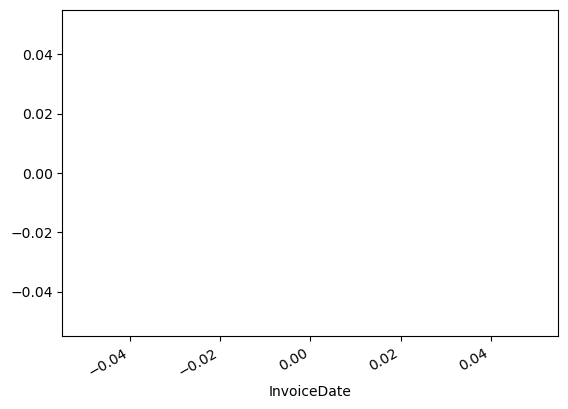

In [58]:
actual_df.Quantity.plot()

### Plotting the prediction

Next, you must convert the JSON response from the predictor to a DataFrame that you can plot.

Start by getting the P10 predictions.


In [59]:
# Generate DF 
prediction_df_p10 = pd.DataFrame.from_dict(forecast_response['Forecast']['Predictions']['p10'])
prediction_df_p10.head()

,Timestamp,Value
0,2010-11-01T00:00:00,-11.522512
1,2010-11-02T00:00:00,28.454214
2,2010-11-03T00:00:00,0.640932
3,2010-11-04T00:00:00,22.949940
4,2010-11-05T00:00:00,12.803575


Next, plot the P10 predictions.

<AxesSubplot: >

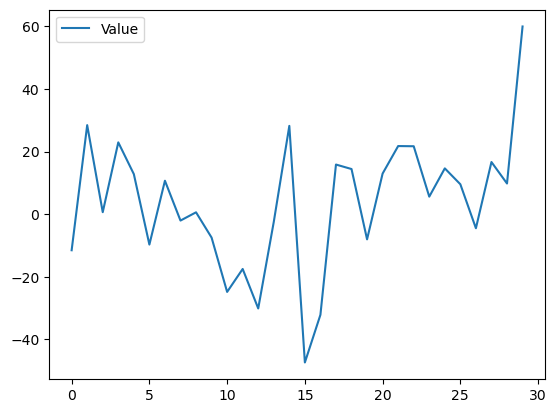

In [60]:
# Plot
prediction_df_p10.plot()


The previous code only retrieved the P10 values and put them in a DataFrame. Now, complete the same process for the P50 and P90 values.


In [61]:
prediction_df_p50 = pd.DataFrame.from_dict(forecast_response['Forecast']['Predictions']['p50'])
prediction_df_p90 = pd.DataFrame.from_dict(forecast_response['Forecast']['Predictions']['p90'])


### Comparing the prediction to actual results

After you obtain the DataFrames, the next task is to plot them together to determine the best fit.


In [62]:
# Start by creating a DataFrame to house the content. Here, Source will be which DataFrame it came from.
results_df = pd.DataFrame(columns=['timestamp','value','Source'])

results_df.head()

,timestamp,value,Source




Import the observed values into the DataFrame:


In [63]:
import dateutil.parser
for index, row in actual_df.iterrows():
    #clean_timestamp = dateutil.parser.parse(index)
    results_df = results_df.append({'timestamp' : index , 'value' : row['Quantity'], 'Source': 'Actual'} , ignore_index=True)

In [64]:
# To show the new DataFrame
results_df.head()

,timestamp,value,Source


In [65]:
# Now add the P10, P50, and P90 Values
for index, row in prediction_df_p10.iterrows():
    clean_timestamp = dateutil.parser.parse(row['Timestamp'])
    results_df = results_df.append({'timestamp' : clean_timestamp , 'value' : row['Value'], 'Source': 'p10'} , ignore_index=True)
for index, row in prediction_df_p50.iterrows():
    clean_timestamp = dateutil.parser.parse(row['Timestamp'])
    results_df = results_df.append({'timestamp' : clean_timestamp , 'value' : row['Value'], 'Source': 'p50'} , ignore_index=True)
for index, row in prediction_df_p90.iterrows():
    clean_timestamp = dateutil.parser.parse(row['Timestamp'])
    results_df = results_df.append({'timestamp' : clean_timestamp , 'value' : row['Value'], 'Source': 'p90'} , ignore_index=True)

By creating a pivot on the data, you can compare the actual P10, P50, and P90 values.

In [66]:
pivot_df = results_df.pivot(columns='Source', values='value', index="timestamp")
pivot_df

Source,p10,p50,p90
timestamp,,,
2010-11-01,-11.522512,-7.825167,-4.750928
2010-11-02,28.454214,42.283909,52.847130
2010-11-03,0.640932,19.936901,37.150921
2010-11-04,22.949940,35.927708,48.719139
2010-11-05,12.803575,23.886583,32.908989
2010-11-06,-9.707551,-0.441223,10.825768
2010-11-07,10.690275,36.679199,63.439377
2010-11-08,-2.037010,69.281097,139.589493
2010-11-09,0.601593,71.781715,148.524994


Charts can be easier to analyze than the raw values.

<AxesSubplot: xlabel='timestamp'>

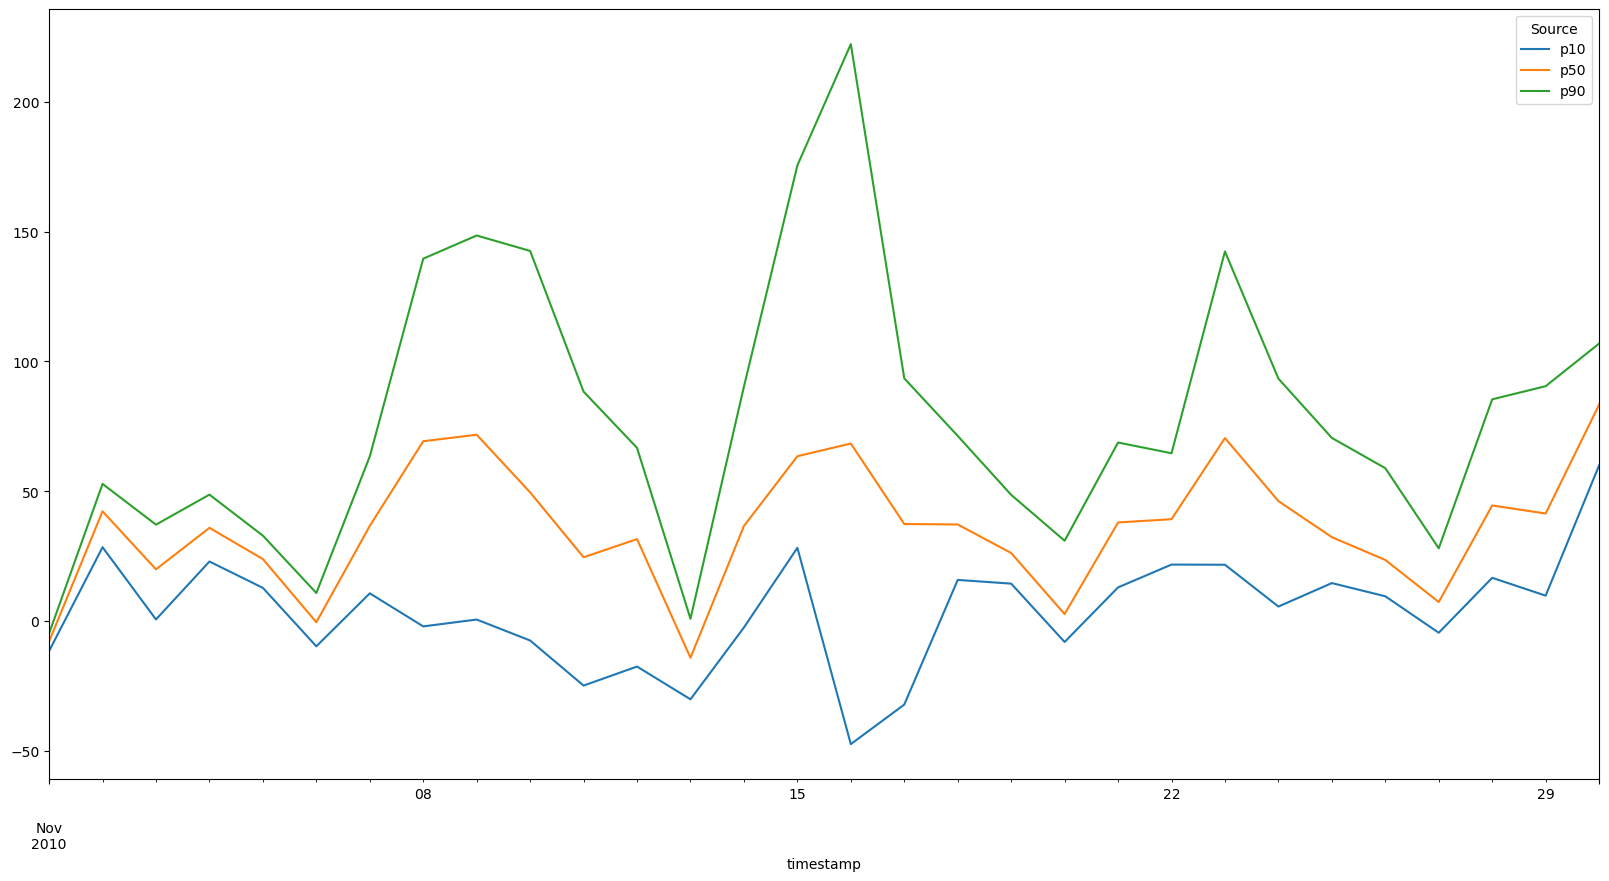

In [67]:
pivot_df.plot(figsize=(20,10))

### Examining the results

Hopefully, in the previous chart, you will see at least some correlation between the predicted values and the actual values. The correlation might not be good, and there could be several reasons for this outcome:

- The sales are mostly wholesale, but they do include some smaller orders.
- You held back data, which meant that an entire season wasn't included in the training data.
- You might have been missing useful category or sales promotion data.

Like all machine learning models, the results are as good as the data you use to train the model. As noted previously, the model could be improved with more data.

## Task 7: Cleaning up

The following cells will clean up the resources that were created during the lab.

In [68]:
%store -r

In [69]:
print(forecast_arn)

arn:aws:forecast:us-east-1:208060389771:forecast/lab_4_deeparp_algo_forecast


In [70]:
forecast.delete_forecast(ForecastArn=forecast_arn)
time.sleep(60)

In [71]:
forecast.delete_predictor(PredictorArn=predictor_arn)
time.sleep(60)

In [72]:
forecast.delete_dataset_import_job(DatasetImportJobArn=ds_related_import_job_arn)

{'ResponseMetadata': {'RequestId': 'f84b29c5-c4d3-49e1-9fa3-1bf59d302737',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'date': 'Sat, 15 Apr 2023 20:39:01 GMT',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '0',
   'connection': 'keep-alive',
   'x-amzn-requestid': 'f84b29c5-c4d3-49e1-9fa3-1bf59d302737'},
  'RetryAttempts': 0}}

In [73]:
forecast.delete_dataset_import_job(DatasetImportJobArn=ds_import_job_arn)

{'ResponseMetadata': {'RequestId': 'ff034b0f-264d-4909-be10-22f450b877a2',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'date': 'Sat, 15 Apr 2023 20:39:01 GMT',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '0',
   'connection': 'keep-alive',
   'x-amzn-requestid': 'ff034b0f-264d-4909-be10-22f450b877a2'},
  'RetryAttempts': 0}}

In [74]:
time.sleep(60)

In [75]:
forecast.delete_dataset(DatasetArn=related_dataset_arn)

{'ResponseMetadata': {'RequestId': 'bfe4b34f-d79b-483d-8028-a699a062b66c',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'date': 'Sat, 15 Apr 2023 20:40:01 GMT',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '0',
   'connection': 'keep-alive',
   'x-amzn-requestid': 'bfe4b34f-d79b-483d-8028-a699a062b66c'},
  'RetryAttempts': 0}}

In [76]:
forecast.delete_dataset(DatasetArn=dataset_arn)

{'ResponseMetadata': {'RequestId': '693581a4-0c8c-4f99-9b61-8f4f2f59febb',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'date': 'Sat, 15 Apr 2023 20:40:01 GMT',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '0',
   'connection': 'keep-alive',
   'x-amzn-requestid': '693581a4-0c8c-4f99-9b61-8f4f2f59febb'},
  'RetryAttempts': 0}}

In [ ]:
time.sleep(60)

In [ ]:
forecast.delete_dataset_group(DatasetGroupArn=dataset_group_arn)